# Introduction

As the other years, we conducted a survey in United-Kingdom to gather information about Research Software Engineers (RSE) in academy. The results can be found [here](https://github.com/softwaresaved/international-survey/blob/master/analysis/results_uk_2017_narrative.ipynb), alongside the results of others countries ([United States](https://github.com/softwaresaved/international-survey/blob/master/analysis/results_us_2017.ipynb), [The Netherlands](https://github.com/softwaresaved/international-survey/blob/master/analysis/results_nl_2017.ipynb), [South Africa](https://github.com/softwaresaved/international-survey/blob/master/analysis/results_zaf_2017.ipynb) and [Germany](https://github.com/softwaresaved/international-survey/blob/master/analysis/results_de_2017.ipynb)).

One essential aspect of the RSE is the *"intricate understanding of research [...] with expertise in programming and software engineering"* [\[1\]](#1). This intricate understanding underlies a multidiscplinary aspect of the RSEs. We could summarise this assumption by seeing an RSEs as a computer scientist developing code for other research fields or a researcher developing code for their own field. In any case, we should be able to see difference between the background of RSEs and their field of work.

This notebook gives a deeper view on the multidiscplinary aspect of the RSEs who participate to the RSE survey in 2017. First it analyse the proportion of multidisciplinarity among them and then give a view of the flow between academic fields. 

Several questions in the survey were about the academic field. 
The first one asked the participants in which of the academic field they did complete their higher diploma. 
The exact question was: *Enter your academic subject*. They had to choose only one answer among 65 disciplines plus an *Other* field that offered them the possibility to enter a freetext. 

A second question was about the field where the participants work rather than their formation. Contrary to the question of education, that question allows the participants to select as many entry as they wanted. 

For both of the questions, the disciplines were took directly from the [JACS 3.0 code](https://www.hesa.ac.uk/support/documentation/jacs/jacs3-principal) using the JACS subject area.

Here is the list of the different discplines:
* Accounting & Finance
* Aeronautical & Manufacturing Engineering
* Agriculture & Forestry
* American Studies
* Anatomy & Physiology
* Anthropology
* Architecture
* Art & Design
* Biological Sciences
* Business & Management Studies
* Chemical Engineering
* Chemistry
* Civil Engineering
* Classics & Ancient History
* Communication & Media Studies
* Complementary Medicine
* Computer Science
* Counselling
* Criminology
* Dentistry
* East & South Asian Studies
* Economics
* Education
* Electrical & Electronic Engineering
* English
* Fashion
* Food Science
* French
* Geography & Environmental Sciences
* Geology
* General Engineering
* German
* History
* History of Art, Architecture & Design
* Hospitality, Leisure, Recreation & Tourism
* Iberian Languages/Hispanic Studies
* Land & Property Management
* Law
* Librarianship & Information Management
* Linguistics
* Marketing
* Materials Technology
* Mathematics
* Mechanical Engineering
* Medicine
* Middle Eastern and African Studies
* Music
* Nursing
* Ophthalmics
* Pharmacology & Pharmacy
* Philosophy
* Physics and Astronomy
* Physiotherapy
* Politics
* Psychology
* Robotics
* Russian & East European Languages
* Social Policy
* Social Work
* Sociology
* Sports Science
* Theology & Religious Studies
* Town & Country Planning and Landscape Design
* Veterinary Medicine
* Youth Work
* Other

## Data preparation

This section details the different steps of cleaning and preparing the dataset to investiguate the multidisciplinary perspective in RSEs. 

In [82]:
from include import sankey
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
pd.options.display.max_rows=8

In [83]:
# Option for jupyter notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

The data come from the UK survey 2017. It is the cleaned version used here. All the details of the cleaning operation can be found in the corresponding [notebook](dropping_participants_process.ipynb#).

In [84]:
# Load the data
df = pd.read_csv('./data/cleaned_data.csv')

# Print the total of participants
print('The total participants in this dataset: {}'.format(len(df)))

The total participants in this dataset: 253


Some participants did not answer the question about the academic field. Therefore they are removed from the data

In [85]:
# Filtering the academic columns

# Get all the columns that are associated with the current field where they works
current_academic = [i for i in df.columns if 'currentEmp13' in i]    
edu_field = ['edu2. In which subject is your highest academic qualification?']
column_to_sample = edu_field + current_academic

# Copy the wanted column into a new df
edu_df = df[column_to_sample].copy()

# rename the column other before because the next transformation does not work with it
edu_df.rename(columns={'[OTHER_RAW]. currentEmp13[SQ066]. In which disciplines do you work (select as many as apply)? [Other]': 'Other'}, inplace=True)

# Rename all the remaining column by extracting the field containd in the last []
edu_df.columns = [s.split('[')[2][:-1] if 'currentEmp13' in s else s for s in edu_df.columns]

# Drop the participant that did not answer which disciplines they have studied
edu_df.dropna(subset=edu_field, inplace=True)

# Print the number of participants after removed the None answer
print('The total participants in this survey after dropping the None answer in the question of education is: {}'.format(len(edu_df)))

The total participants in this survey after dropping the None answer in the question of education is: 251


In [86]:
# Create a new column with the count of the discipline per row. Count only if the cell is equal to 'Yes'
edu_df['Number of disciplines'] = edu_df[edu_df.apply(lambda x: x== 'Yes')].count(axis=1)

# Multidisciplinarity

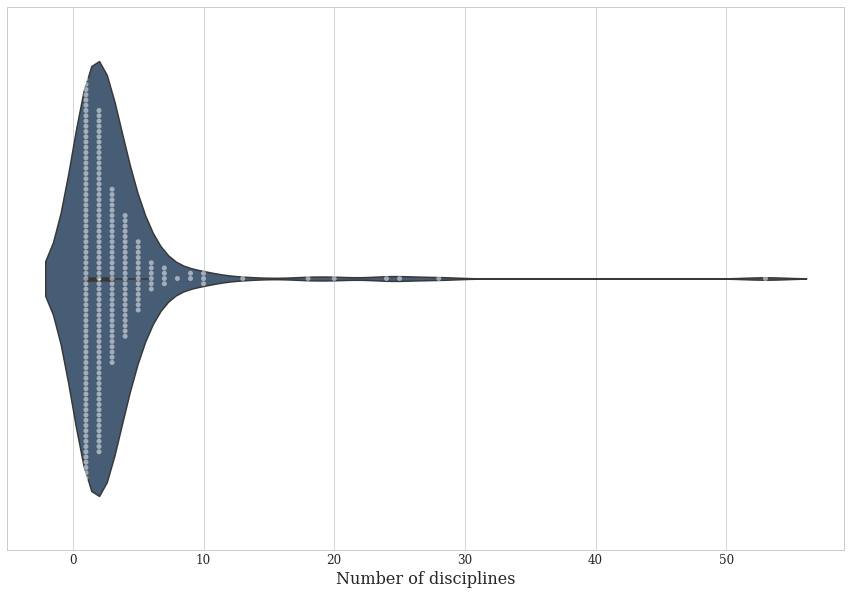

In [87]:
# Creating the figure
plt.figure(figsize=(15, 10))  
#plt.figure() 
ax = plt.subplot(111)  
sns.set_style("whitegrid")
ax = sns.violinplot(x=edu_df['Number of disciplines'], color='#3F5D7D')
sns.swarmplot(x=edu_df['Number of disciplines'], color="w", alpha=.5)
plt.xticks(range(0, 53, 10), fontsize=12)
plt.xlabel("Number of disciplines", fontsize=16)  
plt.show()

A first glance at the unique value shows one outlier. A participants selected 53 disciplines (among the 66 possibles) which seems a bit generalistic. 6 others participants also selected more than 10 different disciplines. It has been decided to drop any participant who claims to work in more than 10 disciplines. Not only they are outliers but it seems unreasonable to be able to work in more than 10 disciplines at once. 

In [88]:
# Filering the dataset to keep only the participants that answered a maximum of 10 different disciplines
edu_df = edu_df[edu_df['Number of disciplines'] <= 10]

print('The total participants in this dataset after dropping the outliers: {}'.format(len(edu_df)))

The total participants in this dataset after dropping the outliers: 244


Without the excessive outlier it is possible to see the repartition of the participants who are working in several fields and how many different fields at the same time 

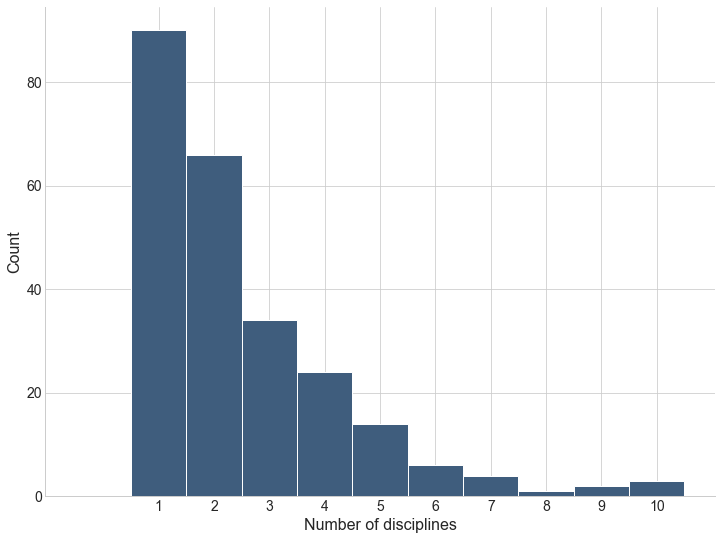

In [89]:
# Creating the figure
plt.figure(figsize=(12, 9))    
ax = plt.subplot(111)  

# Removing the edge lines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Setting up the x and y axis
plt.xticks(range(1, 11, 1), fontsize=14)  
plt.yticks(fontsize=14)  

# Labelling the axis
plt.xlabel("Number of disciplines", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

# Plotting histogram, change the colour of the bar, centrering the bar with the x-ticks and outline the bar with white colour
plt.hist(edu_df['Number of disciplines'], color="#3F5D7D", bins=np.arange(12) - 0.5, ec='white') 
plt.show()

There is a surprising high number of RSE that works in only one discipline however they still account for less than the majority. Following, a table showing the difference in proportion between multidisciplinary RSE and the ones that works only in one field. 

In [90]:
# Creating a new column that take the value Yes if there is more than one discipline
edu_df['Multidisciplinarity'] = edu_df['Number of disciplines'].apply(lambda x: 'Yes' if  x >1 else 'No')

# Count them and create a new data frame with the result
multidisciplinarity = edu_df['Multidisciplinarity'].value_counts().to_frame()

# Rename the column
multidisciplinarity.columns = ['Frequency']

# Create a percentage column
multidisciplinarity['Percentage'] = round(multidisciplinarity['Frequency'] / multidisciplinarity['Frequency'].sum(axis=0) *100)

# Rename the index
multidisciplinarity.index.name = 'Multidiscplinarity'

# Printing the table
multidisciplinarity

,Frequency,Percentage
Multidiscplinarity,,
Yes,154,63.0
No,90,37.0


# The flow between disciplines

In [91]:
# Replace the value 'Yes' by the name of the columns

# Take the column name and use it as the row name
for col in edu_df.columns:
    edu_df[col] = edu_df[col].apply(lambda x: col if x =='Yes' else x)

In [140]:
# Transform the wide format into a long format
melted_df = pd.melt(edu_df.iloc[:,:-2], id_vars=edu_field[0])
melted_df = melted_df[melted_df['value'] != 'No'].drop(['variable'], axis=1)

# Rename the columns as origin and destination
melted_df.columns = ['origin', 'destination']
# reset the index
melted_df = melted_df.reset_index()  # needed for sankey.py to work.
melted_df = melted_df.drop('index', axis=1)
melted_df

,origin,destination
0,Mathematics,Aeronautical & Manufacturing Engineering
1,Materials Technology,Aeronautical & Manufacturing Engineering
2,Mechanical Engineering,Aeronautical & Manufacturing Engineering
3,Physics and Astronomy,Aeronautical & Manufacturing Engineering
4,Aeronautical & Manufacturing Engineering,Aeronautical & Manufacturing Engineering
5,Aeronautical & Manufacturing Engineering,Aeronautical & Manufacturing Engineering
6,Physics and Astronomy,Aeronautical & Manufacturing Engineering
7,Chemistry,Aeronautical & Manufacturing Engineering
8,Computer Science,Agriculture & Forestry
9,Geography & Environmental Sciences,Agriculture & Forestry


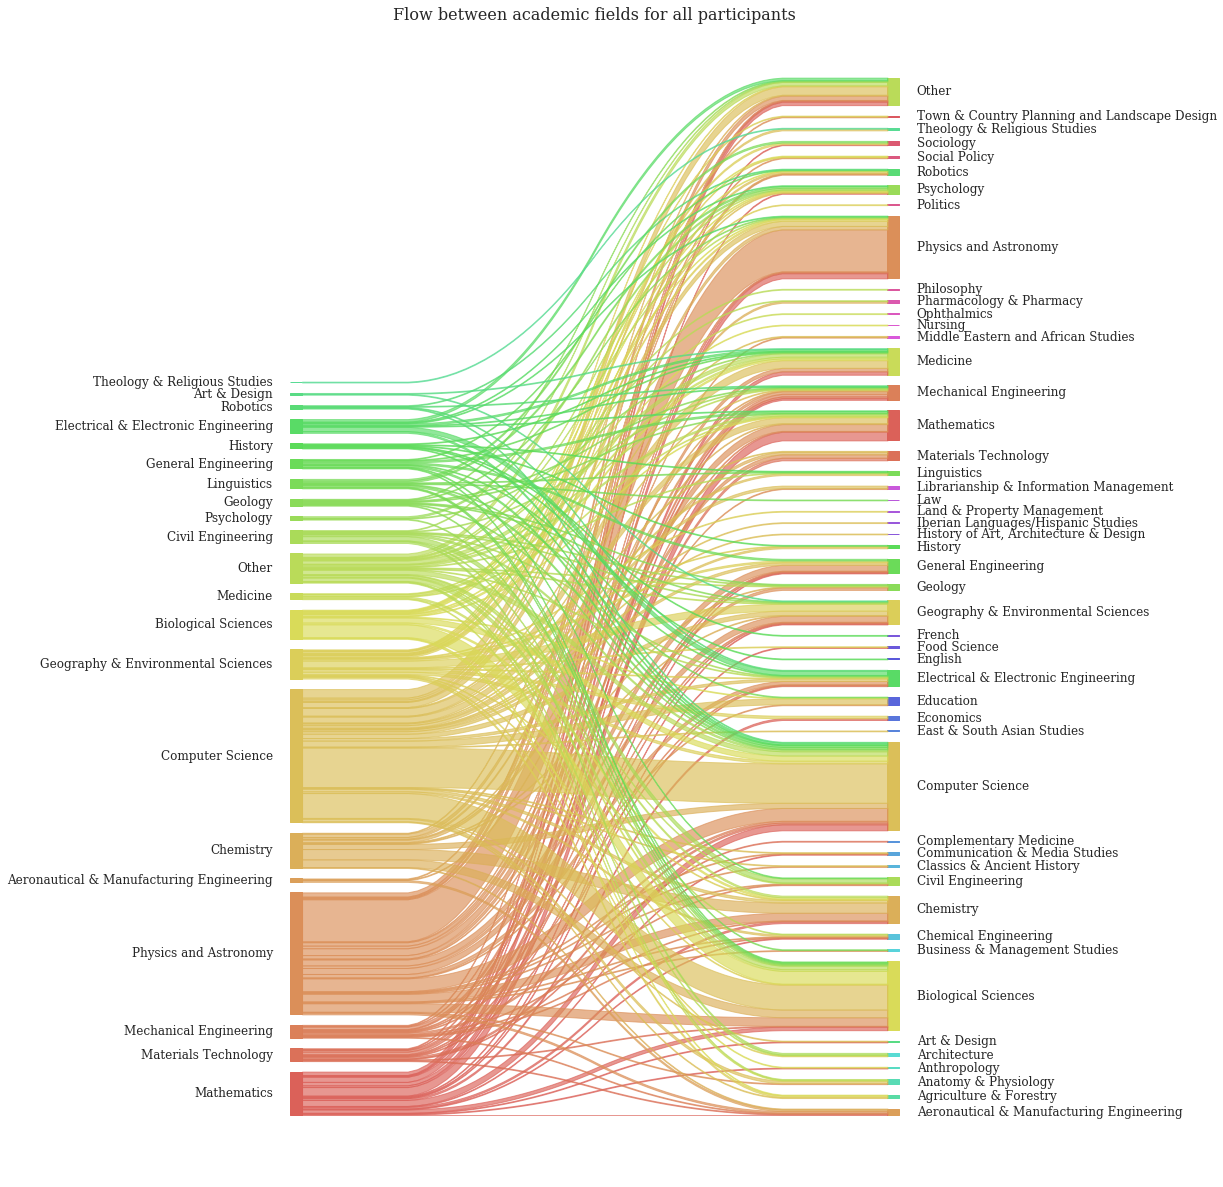

In [135]:
# Plotting the sankey plot for all the participants
sankey.sankey(melted_df['origin'], melted_df['destination'], aspect=20, fontsize=12)
plt.gcf().set_size_inches(12,21)
plt.title('Flow between academic fields for all participants', fontsize=16)
plt.show()

It also could be interesting to see if people that work in only one discipline did change field or stayed in the same area.

In [147]:
# Transform the wide format into a long format
one_field_df = pd.melt(edu_df.loc[edu_df['Multidisciplinarity'] == 'No'].iloc[:,:-2], id_vars=edu_field[0])
one_field_df = one_field_df[one_field_df['value'] != 'No'].drop(['variable'], axis=1)
# Rename the columns as origin and destination
one_field_df.columns = ['origin', 'destination']
# reset the index
one_field_df = one_field_df.reset_index()
one_field_df.drop('index', axis=1, inplace=True)

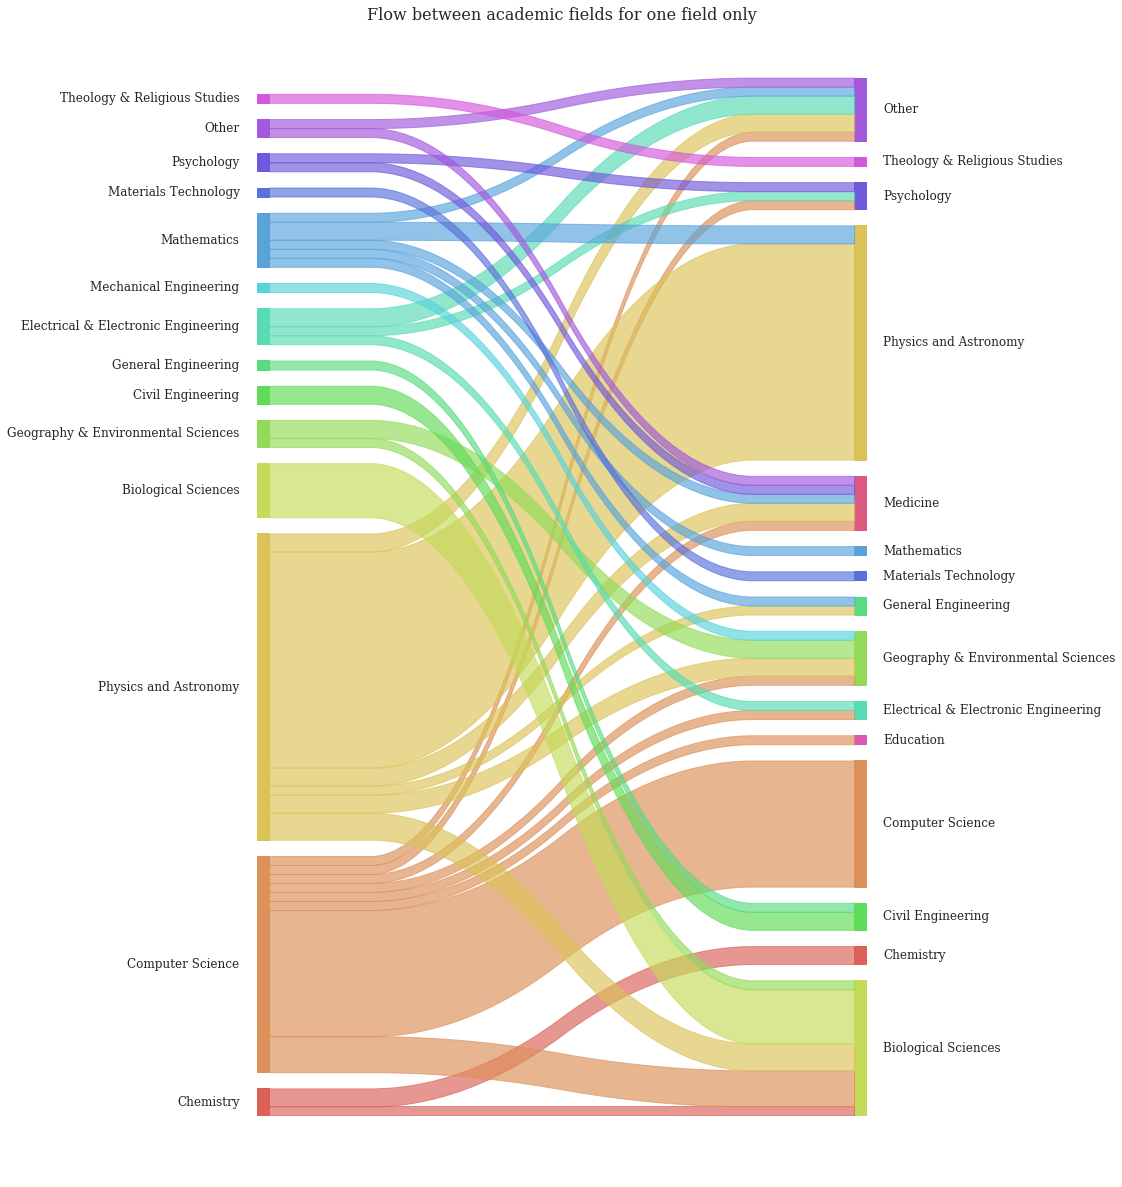

In [148]:
# Plotting the sankey plot for all the participants
sankey.sankey(one_field_df['origin'], one_field_df['destination'], aspect=20, fontsize=12)
plt.gcf().set_size_inches(12,21)
plt.title('Flow between academic fields for one field only', fontsize=16)
plt.show()

In [151]:
one_field_df

,origin,destination
0,Chemistry,Biological Sciences
1,Computer Science,Biological Sciences
2,Computer Science,Biological Sciences
3,Computer Science,Biological Sciences
4,Physics and Astronomy,Biological Sciences
5,Physics and Astronomy,Biological Sciences
6,Biological Sciences,Biological Sciences
7,Computer Science,Biological Sciences
8,Biological Sciences,Biological Sciences
9,Biological Sciences,Biological Sciences


In [162]:
# Create a column with 'Yes' or 'No' based on when the fields are identical or not
one_field_df['Same_field'] = np.where(one_field_df['origin'] == one_field_df['destination'], 'Yes', 'No')

# Counting the number of yes and no based on the origin field
one_field_df.groupby(['origin', 'Same_field']).size().unstack(fill_value=0)

Same_field,No,Yes
origin,,
Biological Sciences,0,6
Chemistry,1,2
Civil Engineering,0,2
Computer Science,10,14
Electrical & Electronic Engineering,3,1
General Engineering,1,0
Geography & Environmental Sciences,1,2
Materials Technology,0,1
Mathematics,5,1


# Freetext fields

At the question about which disciplines they get their education and the question in which field they are working, the survey offered the possibility to fill a freetext field. To complete this overview, wordcloud of each of these field are output here. Each

## Freetext for Education

## Freetext for working 

# References

Here the references that are not directly linked within the text:
* [1] http://rse.ac.uk/who/
* [2] PySankey: https://github.com/anazalea/pySankey